# 3.3 Datenvisualisierung Python
## Bubblechart, Surfaceplot, 3D Scatterplot
### 02.05.2023


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Bubblechart

In [2]:
#Wir starten mit einem Scatterplot
diamonds = sns.load_dataset("diamonds")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='x', ylabel='y'>

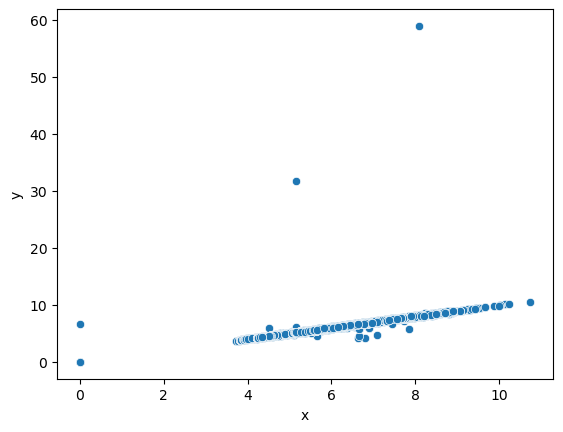

In [3]:
#Scatterplot
sns.scatterplot(diamonds, x="x", y="y")

<Axes: xlabel='x', ylabel='y'>

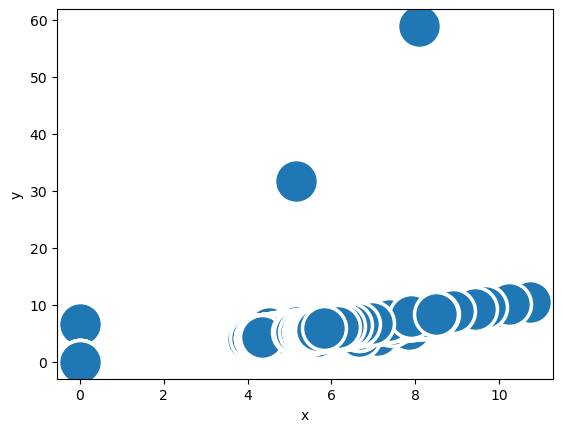

In [4]:
#Einstellung der Größe der Punkte über s
#s ist gar nicht in der Dokumentation vom sns scatterplot vermerkt?
sns.scatterplot(diamonds, x="x", y="y", s=1000) # s yuvarlakların büyüklüğünü değiştiriyor

<Axes: xlabel='x', ylabel='y'>

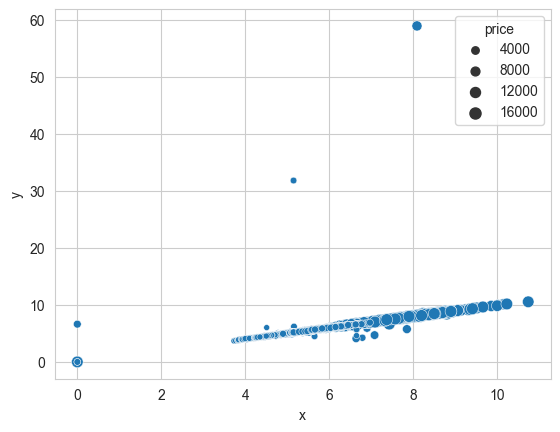

In [10]:
#Einstellen von size um jeden Punkt eine individuelle Größe zu geben, abhängig von einem anderen Wert
sns.scatterplot(diamonds, x="x", y="y", size="price") # price a göre yuvarlaklırın büyüklüğü değişiyor


<Axes: xlabel='x', ylabel='y'>

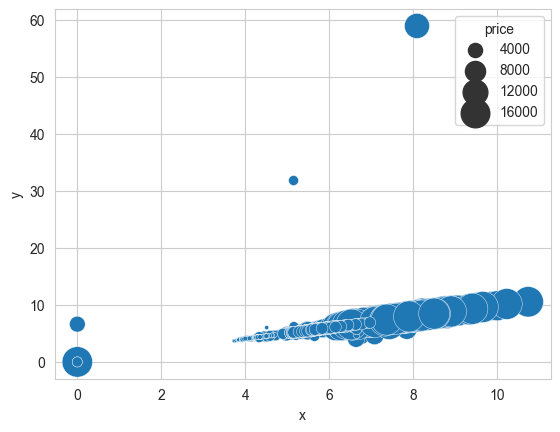

In [11]:
#Mit sizes können wir die minimale Größe bis zu maximalen Größe zusätzlich einstellen.
sns.scatterplot(diamonds, x="x", y="y", size="price", sizes=(5,500))

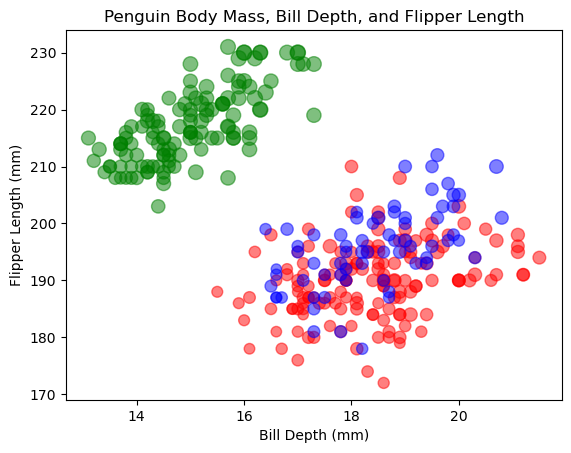

In [7]:
#Bubblechart der Pinguine nach bill depth und flipper length aufgetragen, mit Kategorisierung der Spezies und Gewicht
import matplotlib.pyplot as plt
import pandas as pd

#Dataset
penguins = sns.load_dataset("penguins")

#x,y,z definieren
sizes = penguins["body_mass_g"]
x = penguins["bill_depth_mm"]
y = penguins["flipper_length_mm"]

#zusätzlich die Spezies über Farben trennen
species_colors = {"Adelie": "red", "Chinstrap": "blue", "Gentoo": "green"}
colors = [species_colors[species] for species in penguins["species"]]

#chart erstellen
plt.scatter(x, y, s=sizes/50, c=colors, alpha=0.5)

#erscheinungsbild einfügen
plt.title("Penguin Body Mass, Bill Depth, and Flipper Length")
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")
plt.show()

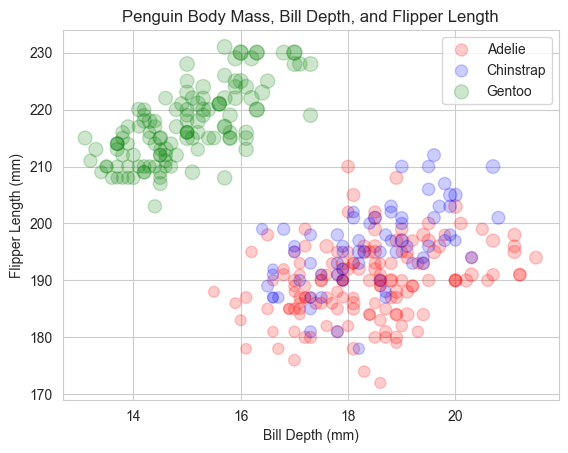

In [3]:
#Und jetzt mit ordentlicher Legende
#zusätzlich die Spezies über Farben trennen
species_colors = {"Adelie": "red", "Chinstrap": "blue", "Gentoo": "green"}

#chart erstellen
for spec in penguins.groupby("species").size().index:
    colors = [species_colors[species] for species in penguins[penguins["species"]==spec]["species"]]
    plt.scatter(penguins[penguins["species"]==spec]["bill_depth_mm"], penguins[penguins["species"]==spec]["flipper_length_mm"], s=penguins[penguins["species"]==spec]["body_mass_g"]/50, c=colors, label=spec, alpha=0.2)

#erscheinungsbild einfügen
plt.title("Penguin Body Mass, Bill Depth, and Flipper Length")
plt.xlabel("Bill Depth (mm)")
plt.ylabel("Flipper Length (mm)")
plt.legend()
plt.show()

## 3D Scatterplot

In [5]:
#Statt wie bisher den Scatterplot in 2D Darzustellen, heben wir diesen nun auf die 3. Dimension
penguins = sns.load_dataset("penguins")
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


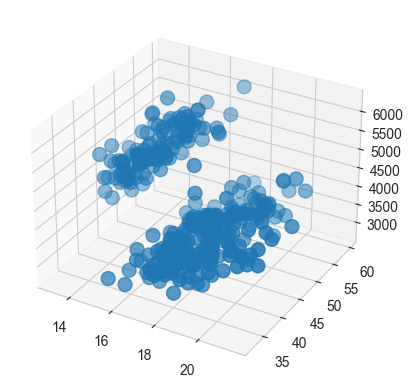

In [14]:
#Einfaches 3D Scatterplot durch Angabe von x, y und z!
ax = plt.axes(projection="3d")
ax.scatter(penguins["bill_depth_mm"],penguins["bill_length_mm"],penguins["body_mass_g"], s=100)


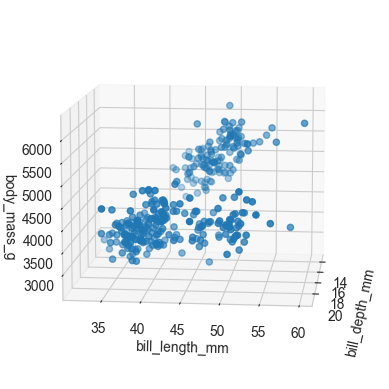

In [6]:
#Jetzt rotieren wir
ax = plt.axes(projection="3d")
ax.scatter(penguins["bill_depth_mm"],penguins["bill_length_mm"],penguins["body_mass_g"], s=20)
ax.set_xlabel("bill_depth_mm")
ax.set_ylabel("bill_length_mm")
ax.set_zlabel("body_mass_g")
ax.view_init(10, 6)

# Übungsaufgabe

### Erstelle die im Unterricht gezeigte Graphik

In [ ]:
ax = plt.axes(projection="3d")
ax.scatter(car["alcohol"], car["speeding"], car["total"], s=200, c="green")

plt.title("Autounfalle in den USA")
plt.xlabel("Alkoholeinfluss [%]")
plt.ylabel("Zu schnell [%]")
ax.set_zlabel("Anzahl der Unfälle in Milliarden[%]")

ax.view_init (15,0)

## Surfaceplot


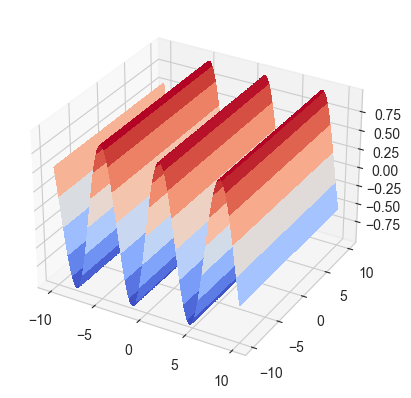

In [3]:
#Pakete laden
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import LinearLocator
from matplotlib import cm

ax = plt.axes(projection= "3d")

# Daten generieren
X = np.arange(-10,10,0.01)
Y = np.arange(-10,10,0.01)
X, Y = np.meshgrid(X, Y)
Z = np.sin(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

Fazit:
Wir schwimmen jetzt schon weiter und weiter weg von einfachen Plots, die nur in Seaborn erstellt werden und kommen mehr und mehr an in Plots, die aus einem wilden Gemisch von Seaborn und Matplotlib erstellt werden. Die heutigen Beispiele sind dabei nur eine kleine Vorausschau auf komplexe grafische Methoden.

Lust auf fortgeschritte Diagramme mit Python? Lasst uns kennenlernen:
[Hier](https://www.python-graph-gallery.com/)

## Übung

Besuche die oben erwähnte Seite und wähle dir eine der verschiedenen Optionen zur Darstellung von Distribution, Correlation, Ranking, Flow oder Part Of A Whole aus, führe das Beispiel durch und entdecke die darin genutzten grafischen Optionen. Bereite damit eine Code-Präsentation vor, in welcher du jeden der Bestandteile der Formel beschreibst und die Grafik insgesamt vorstellst.

Achtung: Bitte NICHT die Bereiche Map oder Animation/Interactivity/3D angreifen, diese wollen wir mit Python und Dash in der nächsten Woche näher kennenlernen.

